In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tqdm import tqdm
%matplotlib inline

In [58]:
raw = pd.read_csv("C:\\DSL_GaTech\\data\\diabetes_csv.csv")
raw[['female','male']] = pd.get_dummies(raw['Gender'])
raw.drop('Gender', axis=1,inplace=True)
raw['Diabetes'] = np.where(raw["Diabetes"].str.contains("Diabetes"), 1, 0)
raw.drop(raw[raw['Glucose'] > 150].index, inplace = True)
raw.head()

,Patient number,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes,female,male
0,1,193,77,49,3.9,19,61,119,22.5,118,70,32,38,0.84,0,1,0
1,2,146,79,41,3.6,19,60,135,26.4,108,58,33,40,0.83,0,1,0
2,3,217,75,54,4.0,20,67,187,29.3,110,72,40,45,0.89,0,1,0
3,4,226,97,70,3.2,20,64,114,19.6,122,64,31,39,0.79,0,1,0
4,5,164,91,67,2.4,20,70,141,20.2,122,86,32,39,0.82,0,1,0


In [59]:
feature_cols = ['Cholesterol', 'Glucose', 'HDL Chol', 'Chol/HDL ratio','Age','Height', 'Weight','BMI','Systolic BP'
               ,'Diastolic BP', 'waist', 'hip', 'Waist/hip ratio', 'female','male']
X = raw[feature_cols] # Features
y = raw['Diabetes'] # Response Variable

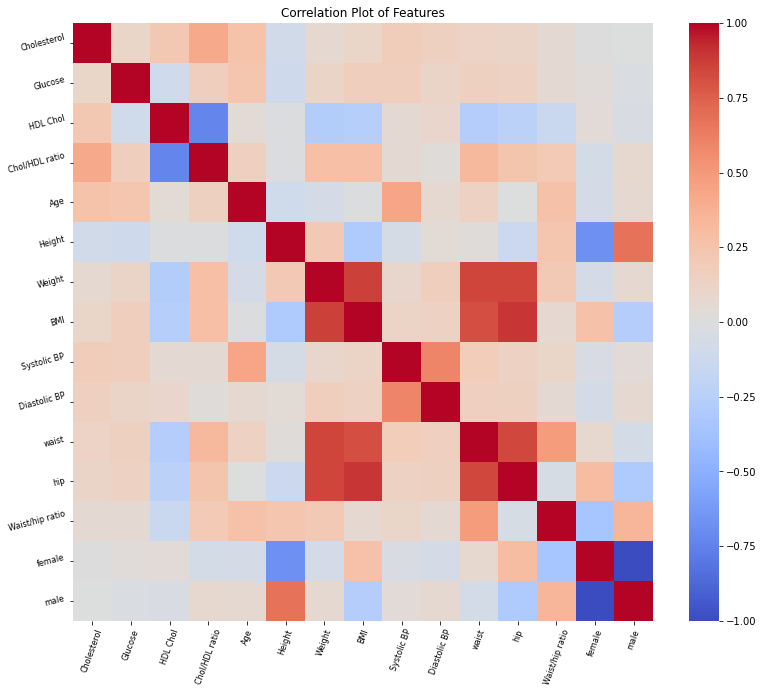

In [60]:
corr = X.corr()
fig = plt.figure(figsize=(13,11))
g1 = sns.heatmap(corr, cmap = 'coolwarm', vmin=-1, vmax=1)
g1.set_xticklabels(g1.get_xticklabels(), rotation=70, fontsize=8)
g1.set_yticklabels(g1.get_yticklabels(), rotation=15, fontsize=8)
plt.title("Correlation Plot of Features")
plt.savefig("Corr_Mean_Features.png", dpi=200)
plt.show()

False    320
True      20
Name: Diabetes, dtype: int64

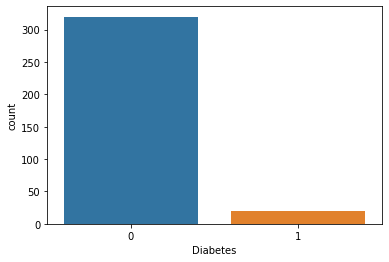

In [161]:
sns.countplot(x = 'Diabetes', data = raw)
plt.savefig('label count.png', dpi=300)
(raw['Diabetes']==1).value_counts()

c:\dsl_gatech\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


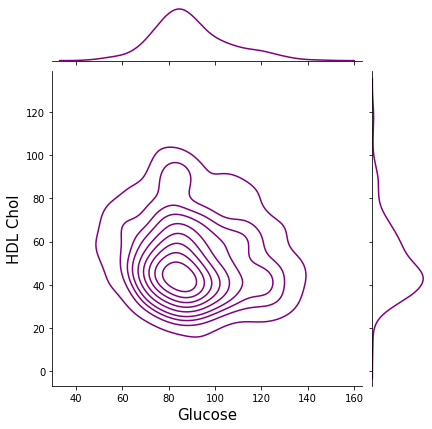

In [6]:
j2 = sns.jointplot(X['Glucose'], X['HDL Chol'], kind='kde', color='purple')
j2.set_axis_labels('Glucose', 'HDL Chol', fontsize=15)

c:\dsl_gatech\venv\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


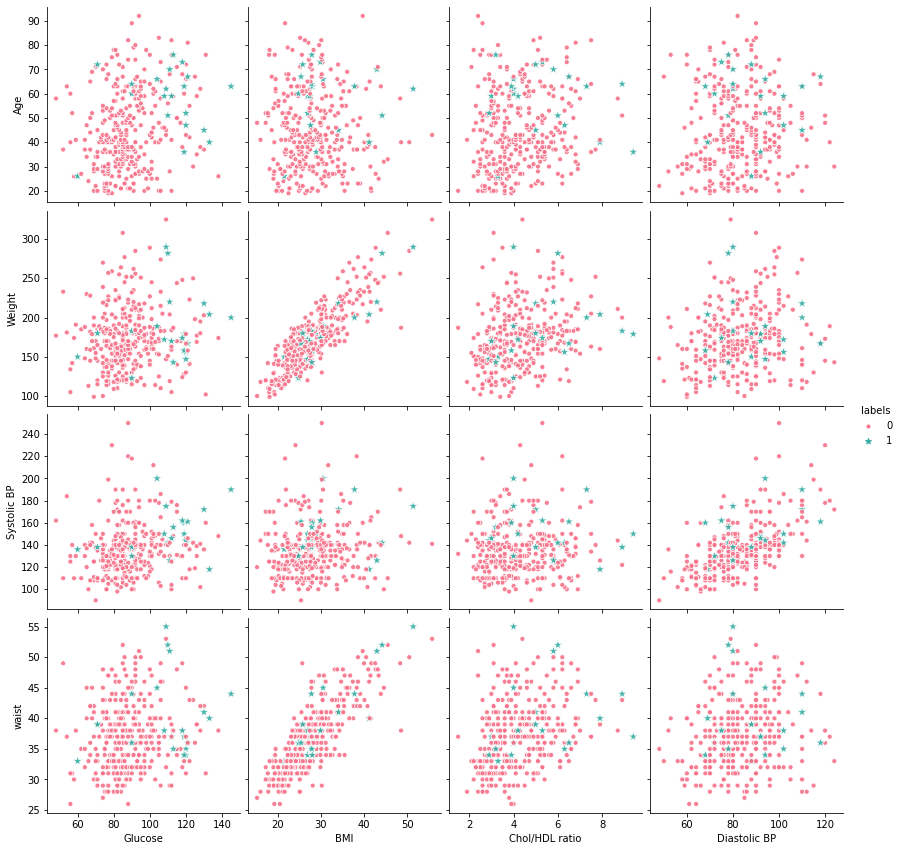

In [18]:

X_with_labels = X.copy()
X_with_labels['labels'] = y
h = sns.pairplot(X_with_labels,
                 x_vars=["Glucose", "BMI", "Chol/HDL ratio", "Diastolic BP"],
                 y_vars=["Age", "Weight", "Systolic BP", "waist"], hue='labels', palette="husl", 
                 height=5, markers=['.', '*'], size=3,
                 plot_kws=dict(s=100, alpha=0.9))




for ix in range(2):
    for jy in range(2):
        xlabel = h.axes[ix][jy].get_xlabel()
        ylabel = h.axes[ix][jy].get_ylabel()   
            
for ixx in range(len(h.fig.get_children()[-1].texts)):
    label = h.fig.get_children()[-1].texts[ixx].get_text()
    

plt.savefig("pairplot1.png", dpi=200)

In [ ]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(raw,figsize=(25, 25))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y, random_state=42)

print ("train feature shape: ", X_train.shape)
print ("test feature shape: ", X_test.shape)

train feature shape:  (272, 15)
test feature shape:  (68, 15)


In [22]:
# first scale data just for visualization
# apply PCA
from sklearn.decomposition import PCA
pca1 = PCA(n_components=4)
pca1.fit(X)
feature_pca = pca1.transform(X)
feature_pca.shape

(340, 4)

In [23]:
# check how much of variance each PC contributing:
feat_var = np.var(feature_pca, axis=0)
feat_var_rat = feat_var/(np.sum(feat_var))
feat_var_rat

array([0.4174249 , 0.36827824, 0.14728812, 0.06700875])

<class 'list'>


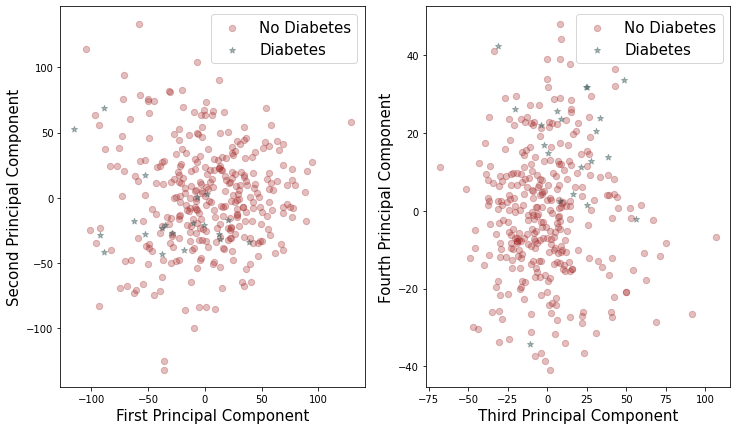

In [26]:
target_list = y.tolist()
print (type(target_list))
feature_pca_X0 = feature_pca[:, 0]
feature_pca_X1 = feature_pca[:, 1]
feature_pca_X2 = feature_pca[:, 2]
feature_pca_X3 = feature_pca[:, 3]

labels = target_list
colordict = {0:'brown', 1:'darkslategray'}
piclabel = {0:'No Diabetes', 1:'Diabetes'}
markers = {0:'o', 1:'*'}
alphas = {0:0.3, 1:0.4}

fig = plt.figure(figsize=(12, 7))
plt.subplot(1,2,1)
for l in np.unique(labels):
    ix = np.where(labels==l)
    plt.scatter(feature_pca_X0[ix], feature_pca_X1[ix], c=colordict[l], 
               label=piclabel[l], s=40, marker=markers[l], alpha=alphas[l])
plt.xlabel("First Principal Component", fontsize=15)
plt.ylabel("Second Principal Component", fontsize=15)

plt.legend(fontsize=15)

plt.subplot(1,2,2)
for l1 in np.unique(labels):
    ix1 = np.where(labels==l1)
    plt.scatter(feature_pca_X2[ix1], feature_pca_X3[ix1], c=colordict[l1], 
               label=piclabel[l1], s=40, marker=markers[l1], alpha=alphas[l1])
plt.xlabel("Third Principal Component", fontsize=15)
plt.ylabel("Fourth Principal Component", fontsize=15)

plt.legend(fontsize=15)

plt.savefig("PCA2D.png", dpi=200)

C:\Users\batmaf1\AppData\Local\Temp/ipykernel_34604/355641460.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110)


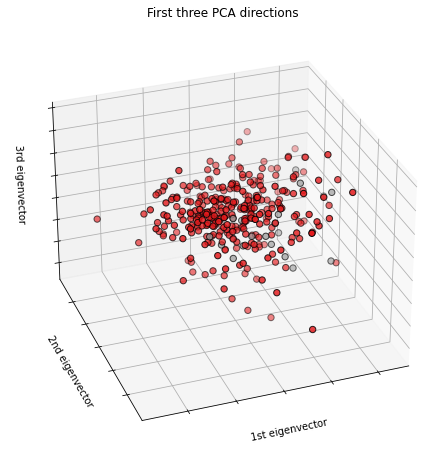

In [27]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.savefig("PCA3D.png", dpi=200)

In [491]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, 
                                                    stratify=y, random_state=42)

print ("train feature shape: ", X_train.shape)
print ("test feature shape: ", X_test.shape)

train feature shape:  (238, 15)
test feature shape:  (102, 15)


In [311]:
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, 
                                                    stratify=y, random_state=42)

smote = EditedNearestNeighbours(sampling_strategy = 'auto', n_neighbors = 5)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [424]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import AllKNN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.under_sampling import OneSidedSelection
import warnings
from sklearn.metrics import confusion_matrix


weights = np.linspace(.005, .25, 5)

pipe_steps = [('edNK', RepeatedEditedNearestNeighbours()), ('boos', GradientBoostingClassifier())]

check_params= {
    'edNK__n_neighbors': [3,5,8,10,15],
    'boos__learning_rate': [.01,.1,.5,1,3],
    'boos__n_estimators': [5,10,50,100,200,400]
}



pipeline = Pipeline(pipe_steps)

In [425]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")


print ("Start Fitting Training Data")
for cv in tqdm(range(10,11)):
    create_grid = GridSearchCV(pipeline, param_grid=check_params, scoring='f1', cv=cv)
    create_grid.fit(X_train, Y_train)
    print ("score for %d fold CV := %3.2f" %(cv, create_grid.score(X_train, Y_train)))
    print ("!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!!!!!")
    print (create_grid.best_params_)

print ("out of the loop")

Start Fitting Training Data


  0%|          | 0/1 [00:00<?, ?it/s]

score for 10 fold CV := 0.62
!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!!!!!
{'boos__learning_rate': 3, 'boos__n_estimators': 100, 'edNK__n_neighbors': 5}
out of the loop


In [426]:
# Time for Prediction and Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Y_pred = create_grid.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix: \n")
print(cm)


print(classification_report(Y_test, Y_pred))

Confusion Matrix: 

[[90  6]
 [ 2  4]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        96
           1       0.40      0.67      0.50         6

    accuracy                           0.92       102
   macro avg       0.69      0.80      0.73       102
weighted avg       0.94      0.92      0.93       102



In [548]:
# first model to try is SVM
# pipeline steps: StandardScaler, PCA, SVM
from tqdm import tqdm_notebook as tqdm
import warnings
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, 
                                                    stratify=y, random_state=42)




pipe_steps = [('edNK', RepeatedEditedNearestNeighbours()),('DT', DecisionTreeClassifier(random_state=42))]
check_params = {
    'edNK__n_neighbors': [1,3,5,8,10,15],
}

pipeline = Pipeline(pipe_steps)

warnings.filterwarnings('ignore')

print('start fitting DT to training data')
for cv in tqdm(range(10,11)):
    grid_DT = GridSearchCV(pipeline, param_grid=check_params, scoring='f1', cv=cv)
    grid_DT.fit(X_train, Y_train)
    print('score for %d fold CV := %3.2f' %(cv, grid_DT.score(X_train, Y_train)))
    print('!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!')
    print(grid_DT.best_params_)
    
print ('out of the loop')
print('grid best params: ', grid_DT.best_params_)





pipe_steps = [('edNK', RepeatedEditedNearestNeighbours()),('adaboost', AdaBoostClassifier(random_state=42))]
check_params = {
    'edNK__n_neighbors': [1,3,5,8,10,15],
    'adaboost__learning_rate': [.1,.5,1,3],
    'adaboost__n_estimators': [50,100,200,400]
}

pipeline = Pipeline(pipe_steps)

warnings.filterwarnings('ignore')

print('start fitting adaboost to training data')
for cv in tqdm(range(10,11)):
    grid_adaboost = GridSearchCV(pipeline, param_grid=check_params,scoring='f1', cv=cv)
    grid_adaboost.fit(X_train, Y_train)
    print('score for %d fold CV := %3.2f' %(cv, grid_adaboost.score(X_train, Y_train)))
    print('!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!')
    print(grid_adaboost.best_params_)
    
print ('out of the loop')
print('grid best params: ', grid_adaboost.best_params_)

    
    
    

pipe_steps = [('edNK', RepeatedEditedNearestNeighbours()),('RF', RandomForestClassifier(random_state=42))]
check_params = {
    'edNK__n_neighbors': [1,3,5,8,10,15],
    'RF__n_estimators': [50,100,200],
}

pipeline = Pipeline(pipe_steps)
warnings.filterwarnings('ignore')

print('start fitting RF to training data')
for cv in tqdm(range(10,11)):
    grid_rf = GridSearchCV(pipeline, param_grid=check_params,scoring='f1', cv=cv)
    grid_rf.fit(X_train, Y_train)
    print('score for %d fold CV := %3.2f' %(cv, grid_rf.score(X_train, Y_train)))
    print('!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!')
    print(grid_svm.best_params_)
    
print ('out of the loop')
print('grid best params: ', grid_svm.best_params_)


    
    
    
pipe_steps = [('edNK', RepeatedEditedNearestNeighbours()), ('SupVM', SVC(kernel='rbf',random_state=42))]
check_params = {
    'edNK__n_neighbors': [1,3,5,8,10,15],
    'SupVM__C': [0.1, 0.5, 1, 10, 30, 40, 50, 75, 100, 500, 1000],
    'SupVM__gamma' : [0.001, 0.005, 0.01, 0.05, 0.07, 0.1, 0.5, 1, 5, 10, 50]
}

pipeline = Pipeline(pipe_steps)
warnings.filterwarnings('ignore')

print('start fitting SVM to training data')
for cv in tqdm(range(10,11)):
    grid_svm = GridSearchCV(pipeline, param_grid=check_params, cv=cv)
    grid_svm.fit(X_train, Y_train)
    print('score for %d fold CV := %3.2f' %(cv, grid_svm.score(X_train, Y_train)))
    print('!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!')
    print(grid_svm.best_params_)
    
print ('out of the loop')
print('grid best params: ', grid_svm.best_params_)





from sklearn.ensemble import GradientBoostingClassifier
pipe_steps = [('edNK', RepeatedEditedNearestNeighbours()),('boos', GradientBoostingClassifier())]
check_params= {
    'edNK__n_neighbors': [1,3,5,8,10,15],
    'boos__learning_rate': [.1,.5,1,3],
    'boos__n_estimators': [50,100,200,400]
}

pipeline = Pipeline(pipe_steps)
print ("Start Fitting gradient boosting to Training Data")
for cv in tqdm(range(10,11)):
    grid_boost = GridSearchCV(pipeline, param_grid=check_params, scoring='f1',cv=cv)
    grid_boost.fit(X_train, Y_train)
    print ("score for %d fold CV := %3.2f" %(cv, grid_boost.score(X_train, Y_train)))
    print ("!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!!!!!")
    print (grid_boost.best_params_)

print ("out of the loop")






pipe_steps = [('edNK', RepeatedEditedNearestNeighbours()),('LogReg', LogisticRegression(random_state=42))]

check_params = {
    'edNK__n_neighbors': [1,3,5,8,10,15],
    'LogReg__C': [0.1, 0.5, 1, 10, 30, 40, 50, 75, 100, 500, 1000]
}

pipeline = Pipeline(pipe_steps)

print('start fitting logistic regression to training data ')
for cv in tqdm(range(10,11)):
    grid_logreg = GridSearchCV(pipeline, param_grid=check_params, scoring='f1',cv=cv)
    grid_logreg.fit(X_train, Y_train)
    print('score for %d fold CV := %3.2f' %(cv, grid_logreg.score(X_train, Y_train)))
    print('!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!')
    print(grid_logreg.best_params_)
    
print ('out of the loop')
print('grid best params: ', grid_logreg.best_params_)







pipe_steps = [('edNK', RepeatedEditedNearestNeighbours()),('KNN', KNeighborsClassifier())]

check_params = {
    'edNK__n_neighbors': [1,3,5,8,10,15],
    'KNN__n_neighbors': [1, 2, 3, 5, 8, 10, 12, 15, 17, 20],
    'KNN__p': [1,2]
}

pipeline = Pipeline(pipe_steps)

print('start fitting KNN to training data ')
for cv in tqdm(range(10,11)):
    grid_knn = GridSearchCV(pipeline, param_grid=check_params,scoring='f1', cv=cv)
    grid_knn.fit(X_train, Y_train)
    print('score for %d fold CV := %3.2f' %(cv, grid_knn.score(X_train, Y_train)))
    print('!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!')
    print(grid_knn.best_params_)
    
print ('out of the loop')
print('grid best params: ', grid_knn.best_params_)






pipe_steps = [('edNK', RepeatedEditedNearestNeighbours()), ('GNB', GaussianNB())]

check_params = {
    'edNK__n_neighbors': [1,3,5,8,10,15],

}

pipeline = Pipeline(pipe_steps)

print('start fitting GNB to training data ')
for cv in tqdm(range(10,11)):
    grid_gnb = GridSearchCV(pipeline, param_grid=check_params,scoring='f1', cv=cv)
    grid_gnb.fit(X_train, Y_train)
    print('score for %d fold CV := %3.2f' %(cv, grid_gnb.score(X_train, Y_train)))
    print('!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!')
    print(grid_gnb.best_params_)
    
print ('out of the loop')
print('grid best params: ', grid_gnb.best_params_)

start fitting DT to training data


  0%|          | 0/1 [00:00<?, ?it/s]

score for 10 fold CV := 0.76
!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!
{'edNK__n_neighbors': 3}
out of the loop
grid best params:  {'edNK__n_neighbors': 3}
start fitting adaboost to training data


  0%|          | 0/1 [00:00<?, ?it/s]

score for 10 fold CV := 0.60
!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!
{'adaboost__learning_rate': 1, 'adaboost__n_estimators': 200, 'edNK__n_neighbors': 5}
out of the loop
grid best params:  {'adaboost__learning_rate': 1, 'adaboost__n_estimators': 200, 'edNK__n_neighbors': 5}
start fitting RF to training data


  0%|          | 0/1 [00:00<?, ?it/s]

score for 10 fold CV := 0.58
!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!
{'SupVM__C': 1, 'SupVM__gamma': 0.001, 'edNK__n_neighbors': 8}
out of the loop
grid best params:  {'SupVM__C': 1, 'SupVM__gamma': 0.001, 'edNK__n_neighbors': 8}
start fitting SVM to training data


  0%|          | 0/1 [00:00<?, ?it/s]

score for 10 fold CV := 0.94
!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!
{'SupVM__C': 0.1, 'SupVM__gamma': 0.001, 'edNK__n_neighbors': 1}
out of the loop
grid best params:  {'SupVM__C': 0.1, 'SupVM__gamma': 0.001, 'edNK__n_neighbors': 1}
Start Fitting gradient boosting to Training Data


  0%|          | 0/1 [00:00<?, ?it/s]

score for 10 fold CV := 0.93
!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!!!!!
{'boos__learning_rate': 0.5, 'boos__n_estimators': 50, 'edNK__n_neighbors': 1}
out of the loop
start fitting logistic regression to training data 


  0%|          | 0/1 [00:00<?, ?it/s]

score for 10 fold CV := 0.34
!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!
{'LogReg__C': 0.1, 'edNK__n_neighbors': 8}
out of the loop
grid best params:  {'LogReg__C': 0.1, 'edNK__n_neighbors': 8}
start fitting KNN to training data 


  0%|          | 0/1 [00:00<?, ?it/s]

score for 10 fold CV := 0.40
!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!
{'KNN__n_neighbors': 12, 'KNN__p': 1, 'edNK__n_neighbors': 15}
out of the loop
grid best params:  {'KNN__n_neighbors': 12, 'KNN__p': 1, 'edNK__n_neighbors': 15}
start fitting GNB to training data 


  0%|          | 0/1 [00:00<?, ?it/s]

score for 10 fold CV := 0.46
!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!
{'edNK__n_neighbors': 1}
out of the loop
grid best params:  {'edNK__n_neighbors': 1}


In [559]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict


probas_DT   = cross_val_predict(grid_DT.best_estimator_, X_train, Y_train, cv=3, method = 'predict_proba')
scores_DT= probas_DT[:,1]


scores_adaboost = cross_val_predict(grid_adaboost.best_estimator_, X_train, Y_train, cv=3, method = 'decision_function')


probas_rf = cross_val_predict(grid_rf.best_estimator_, X_train, Y_train, cv=3, method = 'predict_proba')
scores_rf= probas_rf[:,1]


scores_svm = cross_val_predict(grid_svm.best_estimator_, X_train, Y_train, cv=3, method = 'decision_function')


scores_boost = cross_val_predict(boost_grid.best_estimator_, X_train, Y_train, cv=3, method = 'decision_function')



scores_logreg = cross_val_predict(grid_logreg.best_estimator_, X_train, Y_train, cv=3, method = 'decision_function')



probas_knn = cross_val_predict(grid_knn.best_estimator_, X_train, Y_train, cv=3, method = 'predict_proba')
scores_knn = probas_knn[:,1]


gnb = GaussianNB(priors=None)
probas_gnb = cross_val_predict(grid_gnb.best_estimator_, X_train, Y_train, cv=3, method = 'predict_proba')
scores_gnb = probas_gnb[:,1]

In [560]:
fpr_svm, tpr_svm, thresholds_svm = roc_curve(Y_train, scores_svm)
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(Y_train, scores_logreg)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y_train, scores_knn)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(Y_train, scores_gnb)
fpr_boost, tpr_boost, thresholds_boost = roc_curve(Y_train, scores_boost)
fpr_DT, tpr_DT, thresholds_DT = roc_curve(Y_train, scores_DT)
fpr_adaboost, tpr_adaboost, thresholds_adaboost = roc_curve(Y_train, scores_adaboost)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_train, scores_rf)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)        

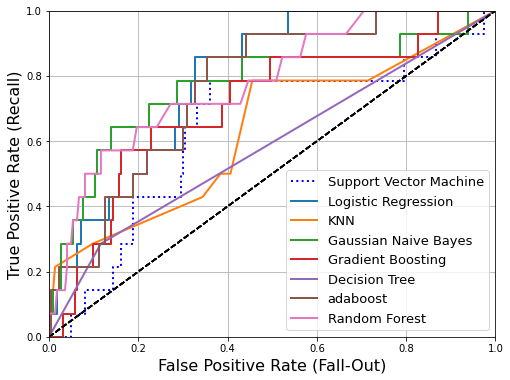

In [561]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, "b:", linewidth=2, label="Support Vector Machine")
plot_roc_curve(fpr_logreg, tpr_logreg, "Logistic Regression")
plot_roc_curve(fpr_knn, tpr_knn, 'KNN')
plot_roc_curve(fpr_gnb, tpr_gnb, 'Gaussian Naive Bayes')
plot_roc_curve(fpr_boost, tpr_boost, 'Gradient Boosting')
plot_roc_curve(fpr_DT, tpr_DT, 'Decision Tree')
plot_roc_curve(fpr_adaboost, tpr_adaboost, 'adaboost')
plot_roc_curve(fpr_rf, tpr_rf, 'Random Forest')
plt.grid(True)
plt.legend(loc="lower right", fontsize=13)
plt.savefig("ROC_train.png", dpi=200)

In [569]:
Y_pred = grid_rf.best_estimator_.predict(X_train)
cm = confusion_matrix(Y_train, Y_pred)
print("Confusion Matrix: \n")
print(cm)


print(classification_report(Y_train, Y_pred))

Confusion Matrix: 

[[204  20]
 [  0  14]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       224
           1       0.41      1.00      0.58        14

    accuracy                           0.92       238
   macro avg       0.71      0.96      0.77       238
weighted avg       0.97      0.92      0.93       238



In [570]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict


probas_DT   = cross_val_predict(grid_DT.best_estimator_, X_test, Y_test, cv=3, method = 'predict_proba')
scores_DT= probas_DT[:,1]


scores_adaboost = cross_val_predict(grid_adaboost.best_estimator_, X_test, Y_test, cv=3, method = 'decision_function')


probas_rf = cross_val_predict(grid_rf.best_estimator_, X_test, Y_test, cv=3, method = 'predict_proba')
scores_rf= probas_rf[:,1]



scores_svm = cross_val_predict(grid_svm.best_estimator_, X_test, Y_test, cv=3, method = 'decision_function')

scores_boost = cross_val_predict(boost_grid.best_estimator_, X_test, Y_test, cv=3, method = 'decision_function')



scores_logreg = cross_val_predict(grid_logreg.best_estimator_, X_test, Y_test, cv=3, method = 'decision_function')



# probas_knn = cross_val_predict(grid_knn.best_estimator_, X_test, Y_test, cv=3, method = 'predict_proba')
# scores_knn = probas_knn[:,1]


gnb = GaussianNB(priors=None)
probas_gnb = cross_val_predict(grid_gnb.best_estimator_, X_test, Y_test, cv=3, method = 'predict_proba')
scores_gnb = probas_gnb[:,1]

In [571]:
fpr_svm, tpr_svm, thresholds_svm = roc_curve(Y_test, scores_svm)
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(Y_test, scores_logreg)
# fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y_test, scores_knn)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(Y_test, scores_gnb)
fpr_boost, tpr_boost, thresholds_boost = roc_curve(Y_test, scores_boost)
fpr_DT, tpr_DT, thresholds_DT = roc_curve(Y_test, scores_DT)
fpr_adaboost, tpr_adaboost, thresholds_adaboost = roc_curve(Y_test, scores_adaboost)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, scores_rf)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)        

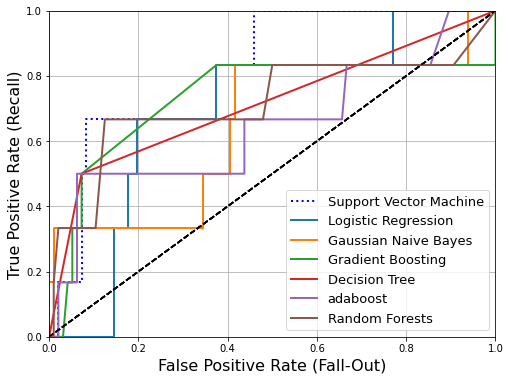

In [572]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, "b:", linewidth=2, label="Support Vector Machine")
plot_roc_curve(fpr_logreg, tpr_logreg, "Logistic Regression")
# plot_roc_curve(fpr_knn, tpr_knn, 'KNN')
plot_roc_curve(fpr_gnb, tpr_gnb, 'Gaussian Naive Bayes')
plot_roc_curve(fpr_boost, tpr_boost, 'Gradient Boosting')
plot_roc_curve(fpr_DT, tpr_DT, 'Decision Tree')
plot_roc_curve(fpr_adaboost, tpr_adaboost, 'adaboost')
plot_roc_curve(fpr_rf, tpr_rf, 'Random Forests')

plt.grid(True)
plt.legend(loc="lower right", fontsize=13)
plt.savefig("ROC_test.png", dpi=200)

In [580]:

Y_pred = grid_rf.best_estimator_.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix: \n")
print(cm)


print(classification_report(Y_test, Y_pred))

Confusion Matrix: 

[[89  7]
 [ 2  4]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        96
           1       0.36      0.67      0.47         6

    accuracy                           0.91       102
   macro avg       0.67      0.80      0.71       102
weighted avg       0.94      0.91      0.92       102



In [581]:
Y_test.value_counts()

0    96
1     6
Name: Diabetes, dtype: int64

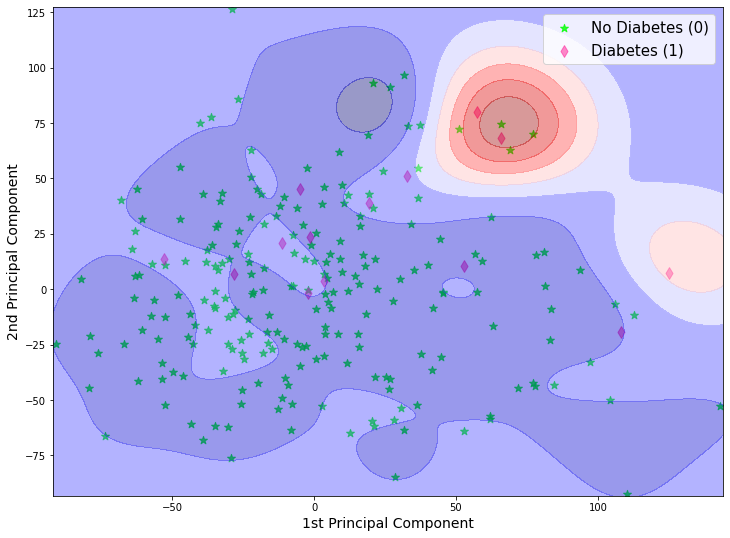

In [600]:
# scaler1 = StandardScaler()
# scaler1.fit(X_test)
X_test_scaled = X_train


pca1 = PCA(n_components=2)
X_test_scaled_reduced = pca1.fit_transform(X_test_scaled)


classify = grid_svm.best_estimator_.fit(X_test_scaled_reduced, Y_train)


def plot_contours(ax, clf, xx, yy, **params):
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    #Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def make_meshgrid(x, y, h=.1):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))#,
                         #np.arange(z_min, z_max, h))
    return xx, yy

X0, X1 = X_test_scaled_reduced[:, 0], X_test_scaled_reduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig, ax = plt.subplots(figsize=(12,9))
fig.patch.set_facecolor('white')
cdict1={0:'lime',1:'deeppink'}

Y_tar_list = Y_train.tolist()
yl1= [int(target1) for target1 in Y_tar_list]
labels1=yl1
 
labl1={0:'No Diabetes (0)',1:'Diabetes (1)'}
marker1={0:'*',1:'d'}
alpha1={0:.8, 1:0.5}

for l1 in np.unique(labels1):
    ix1=np.where(labels1==l1)
    ax.scatter(X0[ix1],X1[ix1], c=cdict1[l1],label=labl1[l1],s=70,marker=marker1[l1],alpha=alpha1[l1])


plot_contours(ax, classify, xx, yy,cmap='seismic', alpha=0.4)
plt.legend(fontsize=15)

plt.xlabel("1st Principal Component",fontsize=14)
plt.ylabel("2nd Principal Component",fontsize=14)

plt.savefig('svm_decision boundary.png', dpi=300)

Joint plot of Glucose with Other Variables ==> 

Correlation between Glucose and Cholesterol ==>  0.10707398747017757


<Figure size 500x400 with 0 Axes>

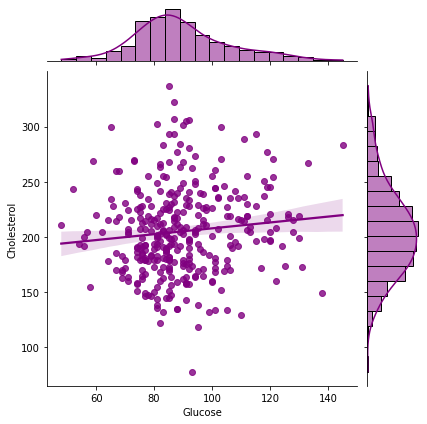

Correlation between Glucose and HDL Chol ==>  -0.09851547824825425


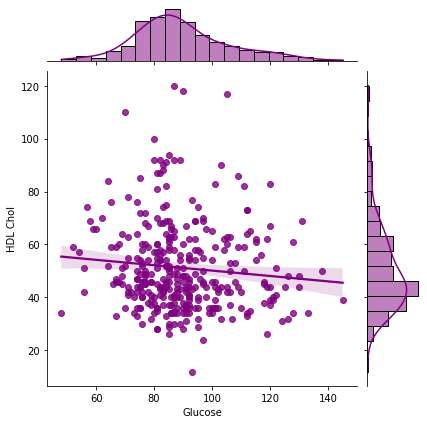

Correlation between Glucose and Chol/HDL ratio ==>  0.17089784459459856


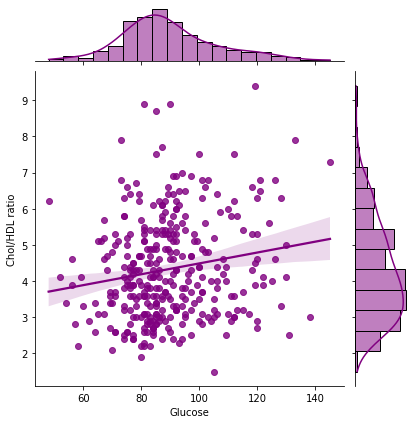

Correlation between Glucose and Age ==>  0.2366093831675458


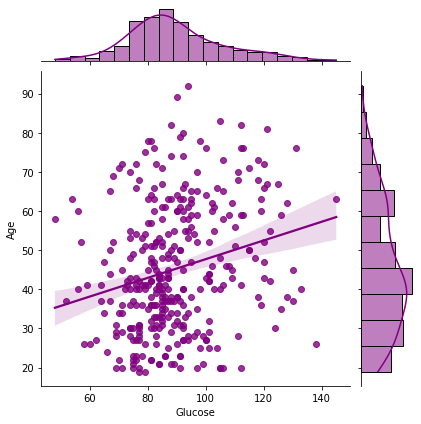

Correlation between Glucose and Height ==>  -0.1041737311130805


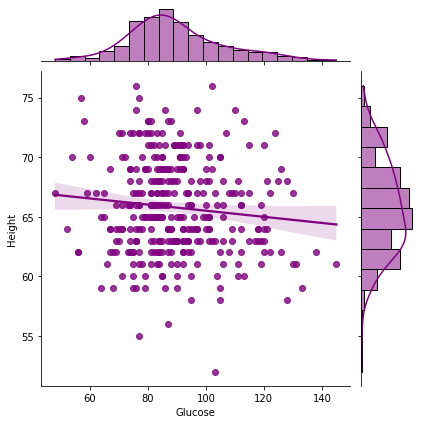

Correlation between Glucose and Weight ==>  0.11494553607553962


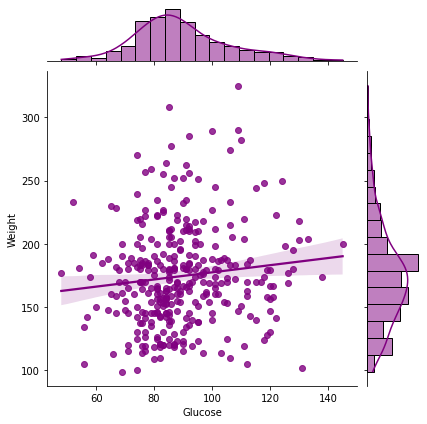

Correlation between Glucose and BMI ==>  0.17123332300907476


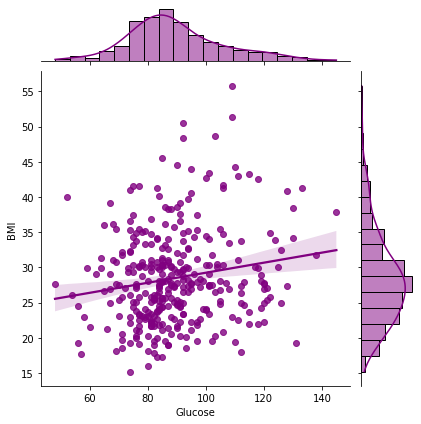

Correlation between Glucose and Systolic BP ==>  0.17163585026651143


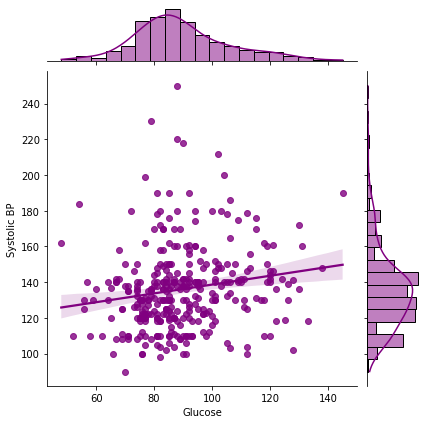

Correlation between Glucose and Diastolic BP ==>  0.10996286160100514


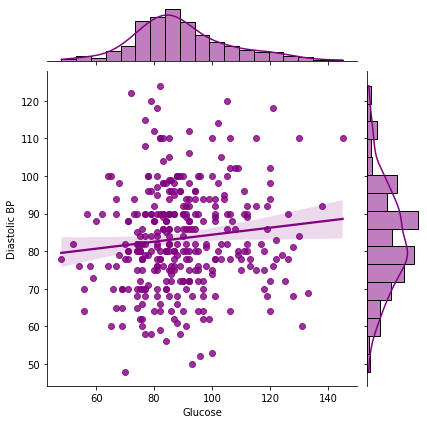

Correlation between Glucose and waist ==>  0.14927940784986757


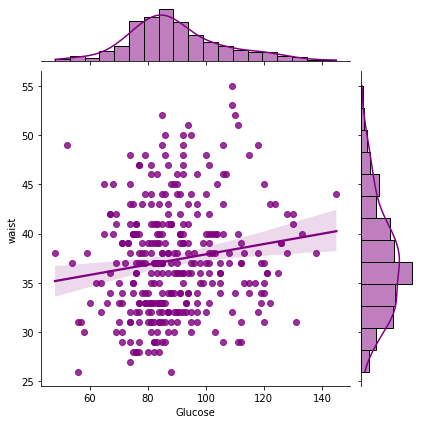

Correlation between Glucose and hip ==>  0.13905997405080495


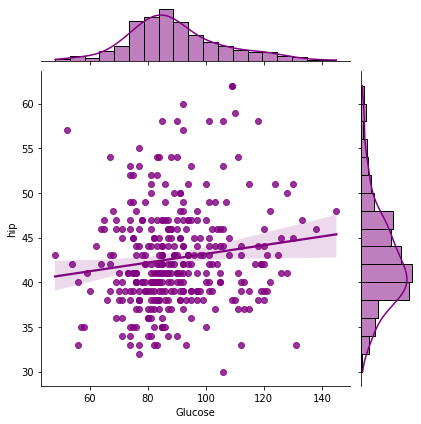

Correlation between Glucose and Waist/hip ratio ==>  0.05667153380297669


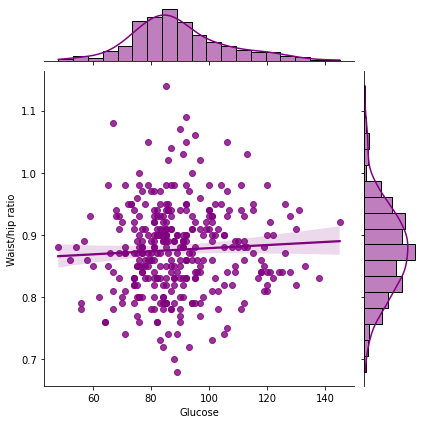

Correlation between Glucose and female ==>  0.029266140284409027


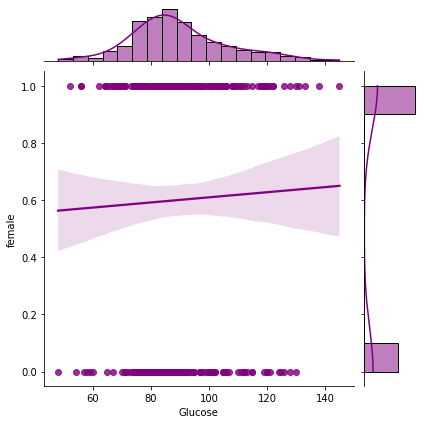

Correlation between Glucose and male ==>  -0.029266140284408933


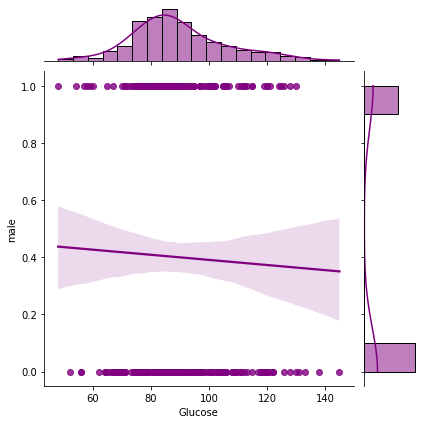

In [601]:
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot of Glucose with Other Variables ==> \n")
for i in  X.columns:
    #if i != 'HDL Chol' and i != 'Diabetes':
    if i != 'Glucose':
        print(f"Correlation between Glucose and {i} ==> ",X.corr().loc['Glucose'][i])
        sns.jointplot(x='Glucose',y=i,data=X,kind = 'reg',color = 'purple')
        plt.show()

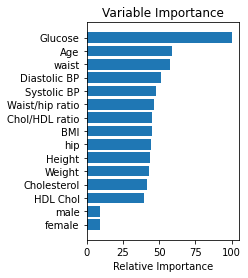

In [602]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=42)

clf.fit(X_train, Y_train)

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.savefig('variable importance.png', dpi=300)